 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [ ]:
# Initial imports and Import libraries for reading csv files
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import os
import csv
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [ ]:
#setting the path for the CSV file
whale_csv = Path("/Users/NatashaPredovic/Documents/GitHub/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")

In [ ]:
# Reading whale returns and setting the date as the datetime index
whale_df = pd.read_csv(whale_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [ ]:
# Check nulls, calculate nulls, Drop nulls and clean data
whale_df.isnull()
whale_df.isnull().sum()
whale_df = whale_df.dropna(how = 'any', axis = 0)
whale_df = whale_df.drop_duplicates()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [ ]:
# Reading algorithmic returns
algo_csv = Path ("/Users/NatashaPredovic/Documents/GitHub/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [ ]:
# Check nulls, calculate nulls, Drop nulls and clean data
algo_df.isnull()
algo_df.isnull().sum()
algo_df = algo_df.dropna(how = 'any', axis = 0)
algo_df = algo_df.drop_duplicates()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path ("/Users/NatashaPredovic/Documents/GitHub/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_history_df = pd.read_csv(sp_tsx_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [ ]:
#Remove characters (ie. $ or other numeric values) and convert the data types as needed
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "")
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype("float")
sp_tsx_history_df.head()

In [ ]:
# Calculate Daily Returns
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].pct_change()
sp_tsx_history_df.head()

In [ ]:
# Check nulls, calculate nulls, Drop nulls and clean data
sp_tsx_history_df.isnull()
sp_tsx_history_df.isnull().sum()
sp_tsx_history_df  = sp_tsx_history_df .dropna(how = 'any', axis = 0)
sp_tsx_history_df  = sp_tsx_history_df .drop_duplicates()

In [ ]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df['SP TSX Close']= sp_tsx_history_df['Close']
#dropping close column as it is being renamed
sp_tsx_history_df.drop('Close', inplace = True, axis = 1)
sp_tsx_history_df.head()

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([ whale_df, algo_df, sp_tsx_history_df ], axis="columns", join="inner")
joined_df.head()

#some point axis = row 

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
# Calculate and Plot daily returns of all portfolios over the last 10 years
daily_returns = joined_df.pct_change()
daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate and plot cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of all portfolios over the Last 10 Years") 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
# Box plot for whale to visually show risk
whale_boxplot = whale_df. boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)


In [ ]:
# Box plot for algo to visually show risk
algo_boxplot = algo_df. boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

In [ ]:
# Box plot for sp tsx  to visually show risk
sp_tsx_history_boxplot = sp_tsx_history_df.boxplot(figsize = (5,5), rot = 90, fontsize= '8', grid = False)

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
joined_cols = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1','Algo 2']
joined_df[joined_cols].std()

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60
dail_sd_sp_tsx_history = sp_tsx_history_df['Closed'].sd()
# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

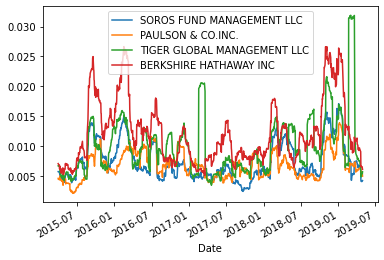

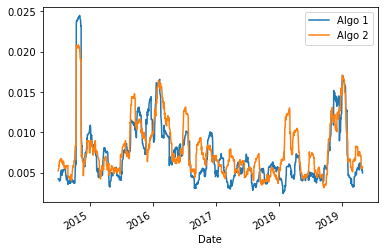

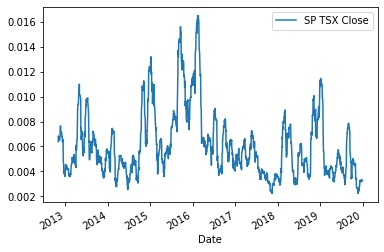

In [813]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
whale_df.rolling(window=21).std().plot()
algo_df.rolling(window=21).std().plot()
sp_tsx_history_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and display the correlation
correlation = daily_returns.corr()
correlation.head()
# Create a heatmap to plot the correlation values and adjust to scale
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio and Calculate variance of S&P TSX
whale_df_cov = whale_df.cov()
whale_df_var = whale_df.var()
sp_tsx_history_df.var()
# Computing beta
whale_beta = whale_df_cov / whale_df_var
# Plot beta trend
whale_beta.plot(figsize=(20, 10), title='Beta Plot of Whale DF')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [812]:
# Use `ewm` to calculate the rolling window
whale_ewm = whale_df.ewm(ignore_na=True, halflife = 21).mean()
algo_ewm = algo_df.ewm(halflife = 21, ignore_na=True).mean()
sp_tsx_history_ewm = sp_tsx_history_df.ewm(halflife = 21, ignore_na=True).mean()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios by using the mean and std functions 
sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
# Display sharpe ratios use a bar plot
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_bar_plot = sharpe_ratios.plot.bar(rot=0)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock
l_historical_csv = Path("/Users/NatashaPredovic/Documents/GitHub/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/l_historical.csv")
l_historical_df = pd.read_csv(l_historical_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
l_historical_df.head()

In [ ]:
# Reading data from 2nd stock
otex_historical_csv = Path("/Users/NatashaPredovic/Documents/GitHub/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/otex_historical.csv")
otex_historical_df = pd.read_csv(otex_historical_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_historical_df.head()

In [ ]:
# Reading data from 3rd stock
shop_historical_csv = Path("/Users/NatashaPredovic/Documents/GitHub/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/04-Pandas/Instructions/Starter_Code/Resources/shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [ ]:
# Combine all stocks in a single DataFrame
custom_joined_df = [l_historical_df,otex_historical_df,shop_historical_df  ]
single_df = pd.concat(custom_joined_df)

In [ ]:
# Reorganize portfolio data by having a column per symbol
single_df.columns = ['L Historical', 'Otex Historical', 'Shop Historical']

In [ ]:
# Calculate daily returns
custom_daily_returns = single_df.pct_change()
# Display sample data
custom_daily_returns.head()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!